<a href="https://colab.research.google.com/github/kouliki/Celebal_task8/blob/main/Celebal_task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (6).json to kaggle (6).json


{'kaggle (6).json': b'{"username":"koulikimahato","key":"b6ce180c38dd23a9a62574b9da0bc963"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          13447        276  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          10166        212  1.0              
kapturovalexander/online-shop-2023                                  🏪🏬🛍️🛒 Online shop 2023                                3KB  2024-07-10 15:36:20            773         21  1.0              
ihelon/coffee-sales                     

### Data importing

In [10]:
! kaggle datasets download -d sonalisingh1411/loan-approval-prediction

Dataset URL: https://www.kaggle.com/datasets/sonalisingh1411/loan-approval-prediction
License(s): unknown
  0% 0.00/13.6k [00:00<?, ?B/s]
100% 13.6k/13.6k [00:00<00:00, 22.4MB/s]


In [11]:
! unzip loan-approval-prediction

Archive:  loan-approval-prediction.zip
  inflating: Sample_Submission.csv   
  inflating: Test Dataset.csv        
  inflating: Training Dataset.csv    


### Importing **libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('/content/Training Dataset.csv')

In [17]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data Pre-Processing

In [18]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
print("the null values are :")
print("\n")
print(data.isnull().sum())
print("\n")

the null values are :


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64




In [23]:
# after removing null values

data= data.dropna()
print("After removing the null values the new count is :")
print("\n")
print(data.isnull().sum())
print("\n")


After removing the null values the new count is :


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64




In [24]:
print("the duplicated values count:")
print(data.duplicated().sum())
print("\n")

the duplicated values count:
0




In [25]:
print("Renaming the columns after removing the starting space")
print("\n")
data.columns=data.columns.str.strip()
data.head()

Renaming the columns after removing the starting space




,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [26]:
data.Married.value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [29]:
data.Loan_Status.value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [30]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [32]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)

<ipython-input-32-72e979fb98c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
<ipython-input-32-72e979fb98c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
<ipython-input-32-72e979fb98c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_History'].fillna(data['Credit_His

### Feature Engineering

In [44]:
#  FOR NON-BINARY -> ONE HOT ENCODING
data = pd.get_dummies(data, columns=['Dependents', 'Property_Area'])

In [45]:
## for converting categorical values into numeric, we use encoding (label and one hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    data.loc[:, column] = le.fit_transform(data[column])

In [46]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,False,True,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,True,False,False,False,False,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,True,False,False,False,False,False,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,True
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,False,False,True,False,False,False,True


In [49]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)

In [50]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,-0.137970,-0.027952,-0.208089,360.0,1.0,0,False,True,False,False,True,False,False
2,1,1,0,1,-0.417536,-0.604633,-0.979001,360.0,1.0,1,True,False,False,False,False,False,True
3,1,1,1,0,-0.491180,0.297100,-0.307562,360.0,1.0,1,True,False,False,False,False,False,True
4,1,0,0,0,0.112280,-0.604633,-0.046446,360.0,1.0,1,True,False,False,False,False,False,True
5,1,1,0,1,0.009319,0.999978,1.520245,360.0,1.0,1,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,-0.435196,-0.604633,-0.916831,360.0,1.0,1,True,False,False,False,True,False,False
610,1,1,0,0,-0.222210,-0.604633,-1.302286,180.0,1.0,1,False,False,False,True,True,False,False
611,1,1,0,0,0.478206,-0.512854,1.346168,360.0,1.0,1,False,True,False,False,False,False,True
612,1,1,0,0,0.391846,-0.604633,0.525520,360.0,1.0,1,False,False,True,False,False,False,True


### Data visualization

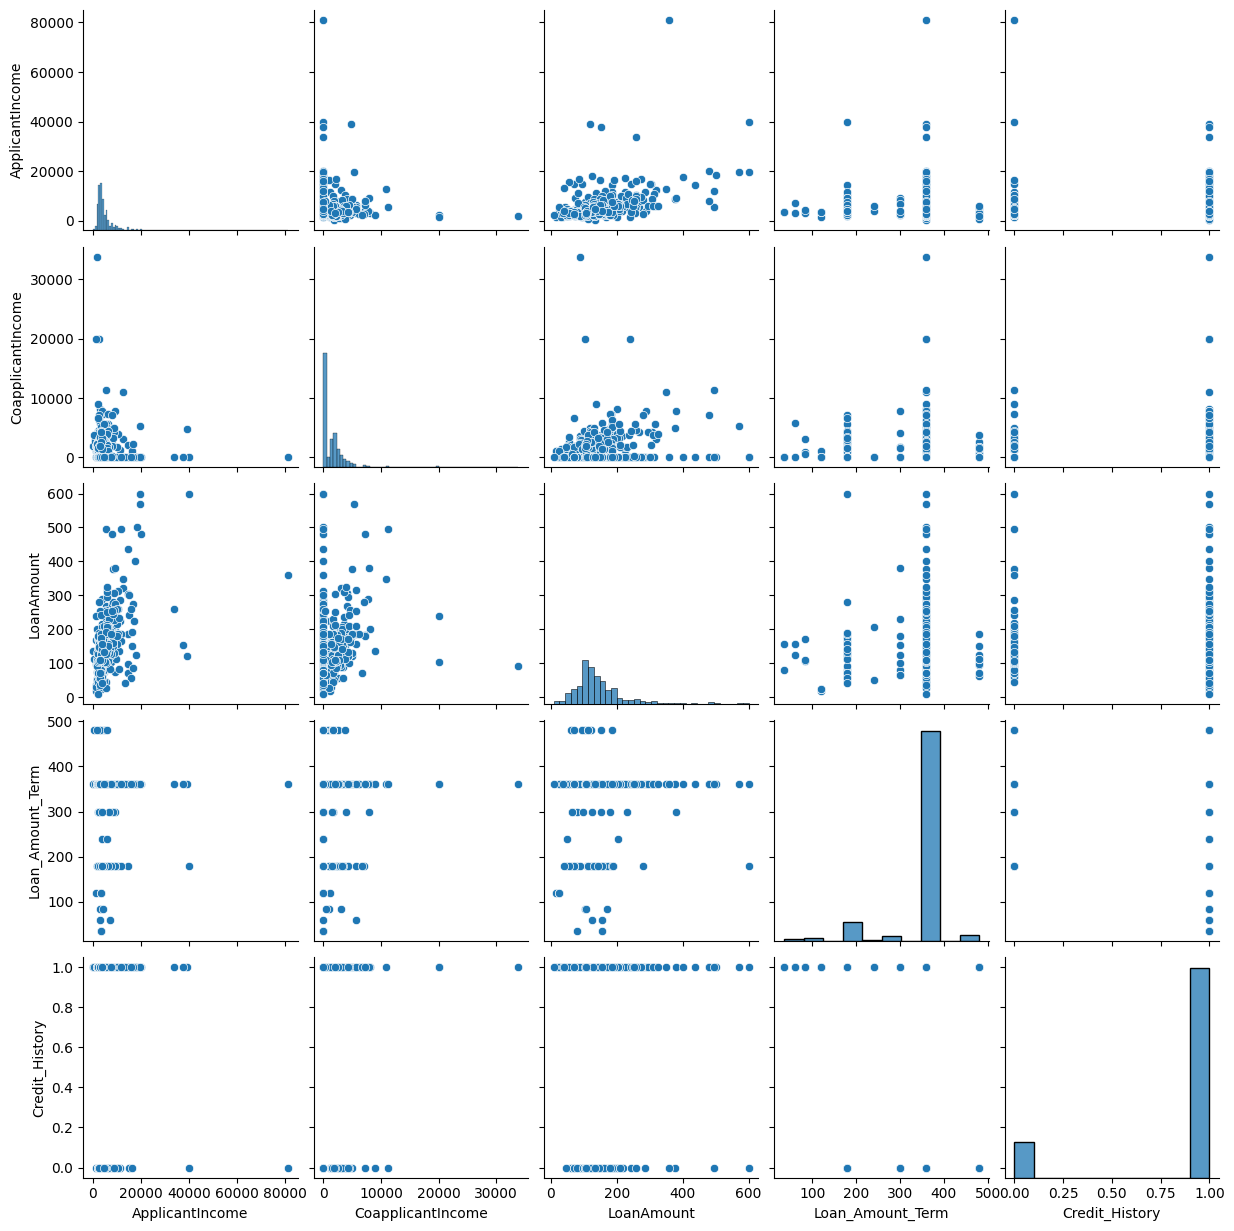

In [33]:
import seaborn as sns
sns.pairplot(data)
plt.show()

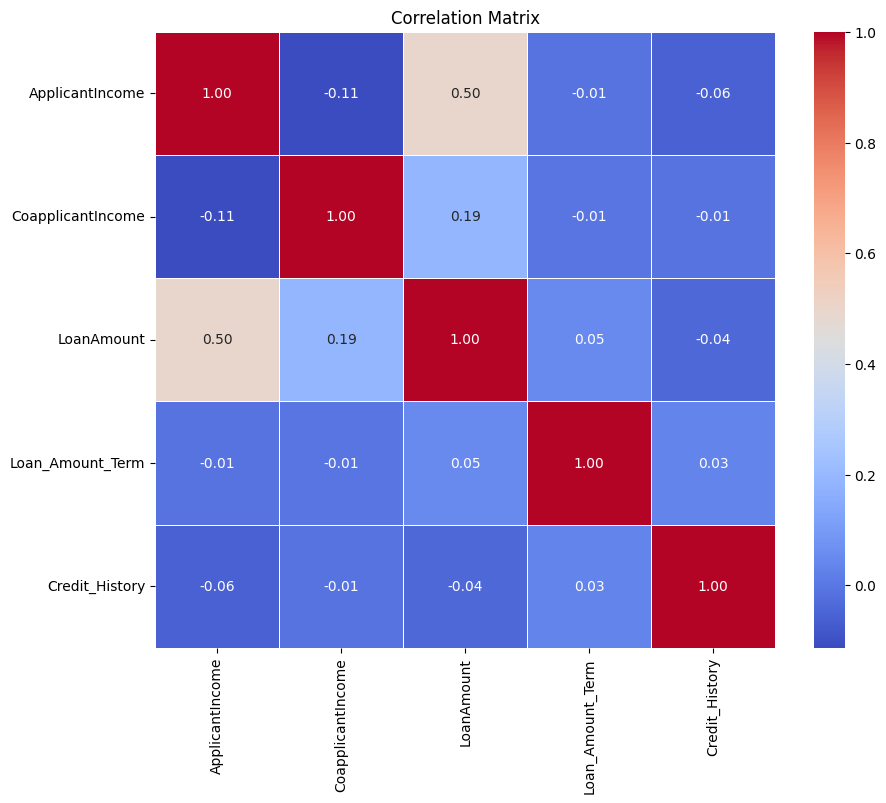

In [41]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()